In [1]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
from PIL import Image
import math


#Leeemos la imagen
plt.rcParams['image.cmap'] = 'gray'
image = io.imread('imagenes/granos.png') #Imagen original

#Funcion para plotear de volon pimpon
def plot(objeto):
    plt.imshow(objeto)
    
#Funcion para normalizar una imagen
def normaliza_imagen(imagen):
    normal= imagen/255.0
    return normal
    


In [29]:
#Creamos una funcion que llena un diccionario con los datos necesarios
def crea_diccionario(imagen):
    pixels={}
    for i in range(0,256):
        pixels[i]=0
    
    for col in range(0,imagen.shape[0]):
        for ren in range(0,imagen.shape[1]):
            try:
                pixels[imagen[col][ren]]+=1
            except:
                pixels[imagen[col][ren]]=1
    #print(pixels)
    return pixels



In [3]:
#Ploteamos el histograma obtenido anteriormente
def plot_histograma(diccionario):
    x = list(diccionario.keys())
    y = list(diccionario.values())
    fig,ax= plt.subplots()
    ax.bar(x=x, height=y, color= "green")
    plt.title('Histograma')
    plt.xlabel('Tonos de gris')
    plt.ylabel('Frecuencia')
    plt.show()





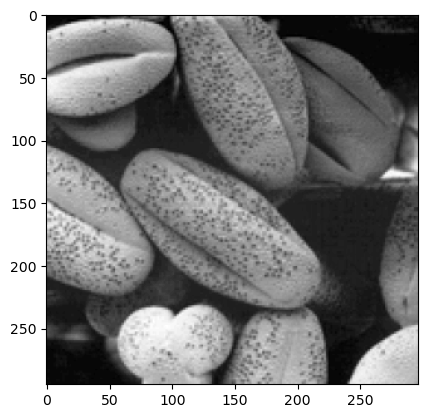

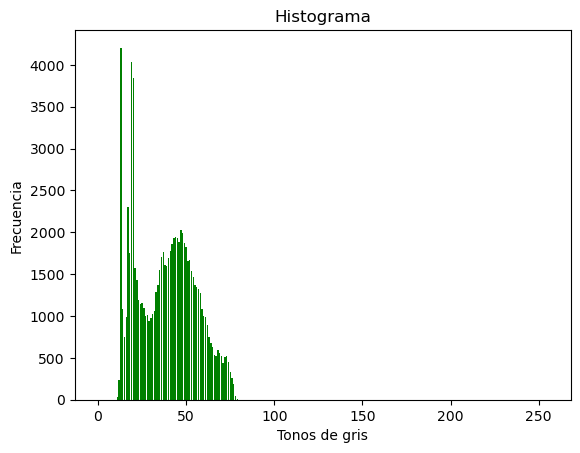

In [26]:
#Mostramos la imagen original
plot(image) 
#Creamos el diccionario 1, guarda que tonos de gris tiene y cuantas veces se repite ese tono
dic1=crea_diccionario(image)
#Mostramos su histograma
plot_histograma(dic1)

In [5]:

#Creamos una funcion para sacar la inversa
def inversa(imagen):
    calculo=0
    s=imagen.shape
    inv=np.ones((s[0],s[1]))
    for col in range(0,inv.shape[0]):
        for ren in range(0,inv.shape[1]):
            calculo= 255-imagen[col][ren]
            inv[col][ren]=calculo
    return inv




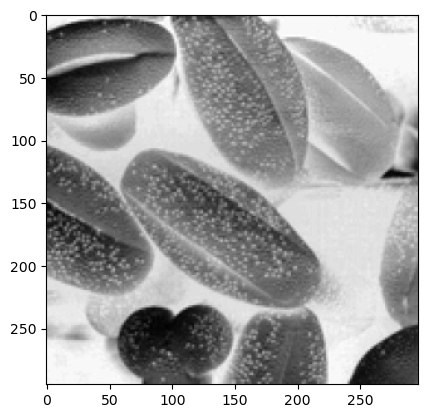

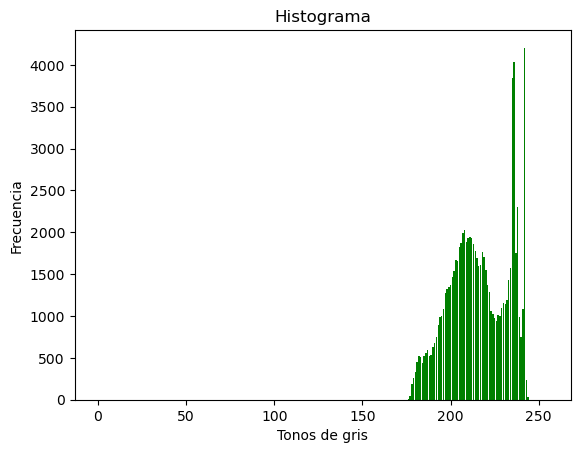

In [6]:
invertida = inversa(image)
#Ploteamos la imagen inversa
plot(invertida)
#Creamos el histograma y lo ploteamos
dic2=crea_diccionario(invertida)
plot_histograma(dic2)

In [56]:
#Creamos la funcion para sacar la logaritmica
def logaritmica(imagen):
    s=imagen.shape
    loga=np.ones((s[0],s[1]))
    for col in range(0,loga.shape[0]):
        for ren in range(0,loga.shape[1]):
            loga[col][ren]=np.floor(int(500*(np.log(1+imagen[col][ren]))))
    return loga*30



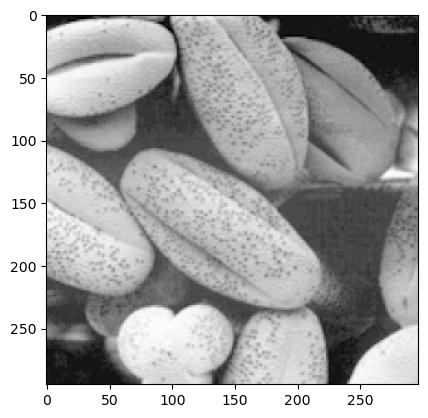

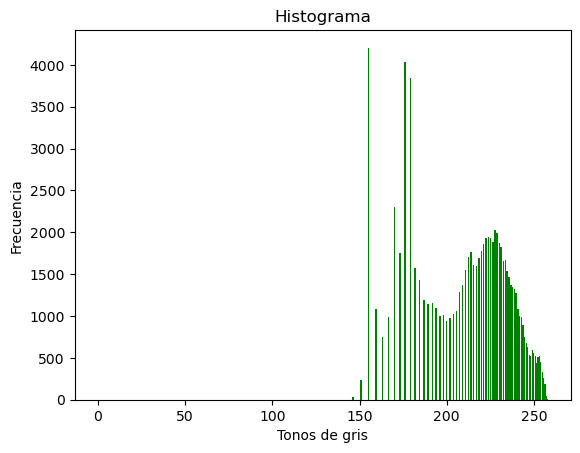

In [57]:
logaritmo=logaritmica(image)/255
#print(logaritmo)
#ploteamos la imagen logaritmica
plot(logaritmo)
#Creamos el histograma y lo ploteamos
dic3=crea_diccionario(logaritmo)
plot_histograma(dic3)

In [9]:
#Creamos la función gamma, la cual le dara o quitara brillo a la imagen
def gamma(imagen):
    s=imagen.shape
    gam=np.ones((s[0],s[1]))
    for col in range(0,gam.shape[0]):
        for ren in range(0,gam.shape[1]):
            gam[col][ren]=(imagen[col][ren])**1.2
    return gam

    

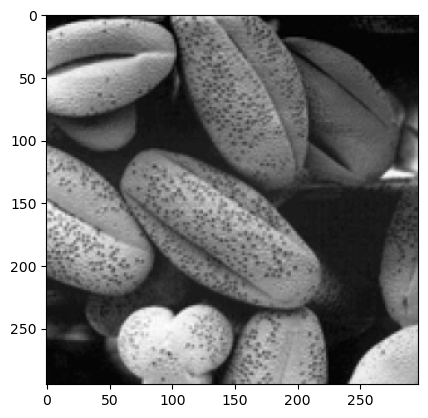

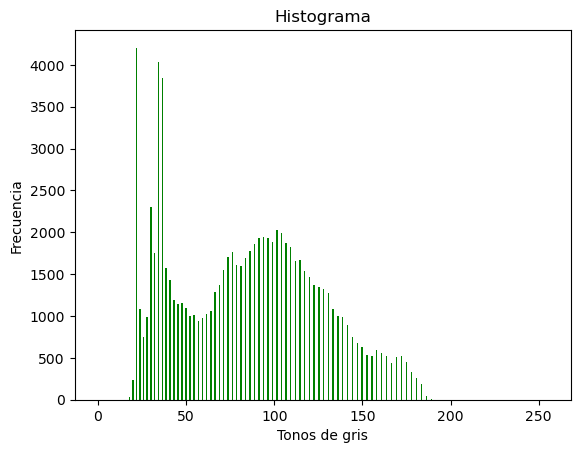

In [35]:
gamm=gamma(image)
#Ploteamos la imagen gamma
plot(gamm)
#Creamos histograma y ploteamos
dic5=crea_diccionario(gamm)
plot_histograma(dic5)

In [58]:
#Funcion que Ecualiza una imagen
def ecualizar(imagen,lista):
    s=imagen.shape
    totalP=s[0]*s[1]
    ecualizada=np.zeros((s[0],s[1]))
    mProba=[]
    acumulaPr=[0]
    transformada=[]
    for i in range(len(lista)):
        mProba.append(lista[i]/totalP)
    for j in range(1,(len(lista))):
        acumulaPr.append(acumulaPr[j-1]+mProba[j])
    for ren in range(0,ecualizada.shape[0]):
        for col in range(0,ecualizada.shape[1]):
            pixel=int(imagen[ren][col])
            ecualizada[ren][col] = np.floor(int((pixel+1)*acumulaPr[pixel]))*255
    return ecualizada
            

    

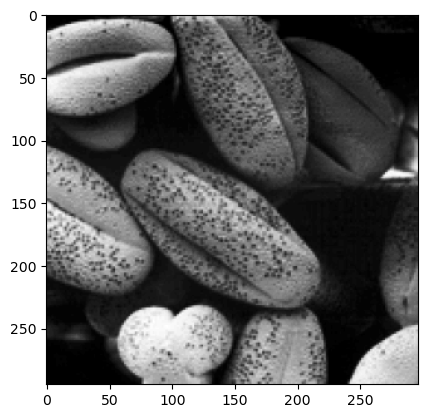

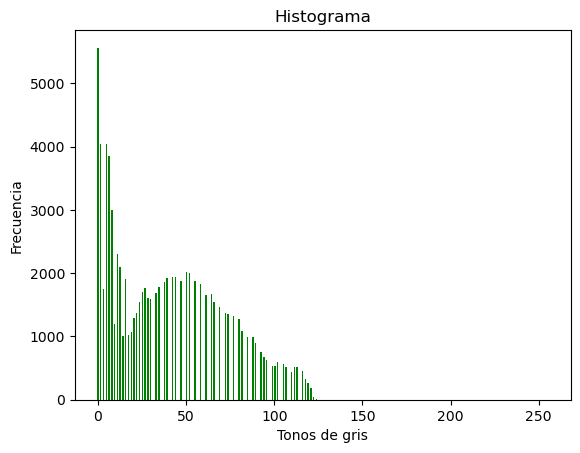

In [59]:
#Ecualizamos la imagen original
ecu=ecualizar(image,dic1)/255
#Creamos su histograma
dicEc=crea_diccionario(ecu)
plot(ecu)
plot_histograma(dicEc)

In [13]:
#Funciones para agregarle ruido a nuestra imagen

#Ruido Gaussiano

def rGaussiano(imagen,desviacion=50):
    im_array= np.array(imagen, dtype=np.uint8)
    ruido= np.random.normal(0,desviacion,im_array.shape)
    im_ruido= im_array+ruido
    im_ruido= np.clip(im_ruido,0,255)
    im_ruido_pil= Image.fromarray(im_ruido.astype(np.uint8), 'L')
    
    return im_ruido_pil

# Ruido sal pimienta
def rSalPim(imagen):
    s= imagen.copy()/255
    y, x= imagen.shape
    pimienta=0.005
    sal= 1- pimienta
    for ren in range(y):
        for col in range(x):
            rnd= np.random.random()
            if rnd < pimienta:
                s[ren][col]=0
            elif rnd > sal:
                s[ren][col]=1
    return s/255

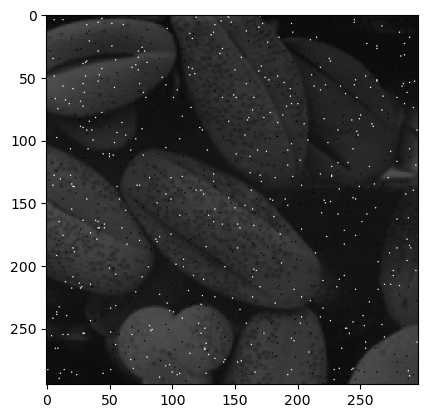

In [14]:
im_sal_p= rSalPim(image)
plot(im_sal_p)

In [15]:
# Intento del filtro paso bajas
# El filtro paso-bajas es un filtro de promedio, y este puede ser estandar o ponderado
# Haré el estandar porque no veo por qué usaría el ponderado.
# La imagen debería quedar más borrosa

def filtro(imagen,tam_del_filtro, funcion):
    s= imagen.shape
    im_pb= np.zeros((s[0],s[1]))
    inicio = tam_del_filtro//2
    for y in range(inicio, s[0]-inicio):
        for x in range(inicio, s[1]-inicio):
            area = []
            for i in range(-inicio, inicio):
                for j in range(-inicio, inicio):
                    area.append(imagen[y+i][x+j])
            im_pb[y][x] = funcion(area)
    return im_pb
    
    
def prom_kernel_estandar(area):
    p = 0;
    for i in range(len(area)):
        p += area[i]
    return p/len(area)**2

def prom_kernel_ponderado(area):
    '''Para el iniciso b) con el kernel ponderado'''
    p = 0
    tam = math.sqrt(len(area))
    for i in range(len(area)):
        if i-1 % tam == 0:
            p += area[i]
        ##hay q sumar bien las coasas para un area de tamaño m*n (solo existe la tabla 3x3)
    return p/len(area)**2
    

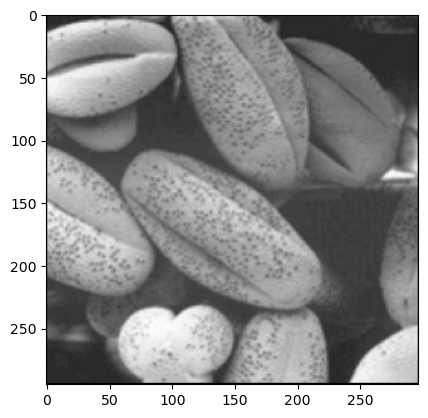

In [60]:
#Paso bajas con kernel de 3x3
smooth_im= filtro(image,3,prom_kernel_estandar)
plot(smooth_im)

## Falta plotear la imágen "Sucia" y con los tamaños 5, 7, 11

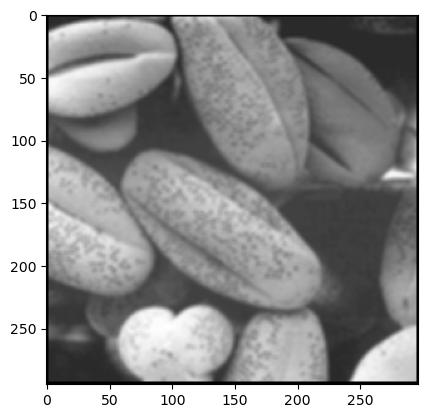

In [61]:
#Paso bajas con kernel de 5x5
smooth_im5= filtro(image,5,prom_kernel_estandar)
plot(smooth_im5)

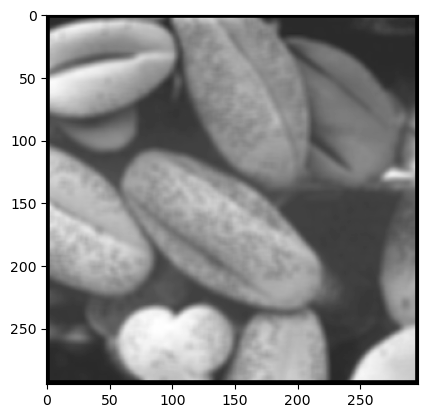

In [62]:
#Paso bajas con kernel de 7x7
smooth_im7= filtro(image,7,prom_kernel_estandar)
plot(smooth_im7)

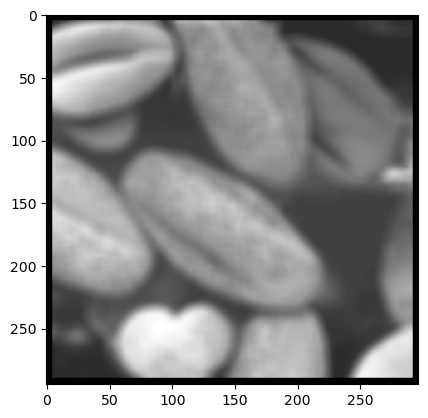

In [63]:
#Paso bajas con kernel de 11x11
smooth_im11= filtro(image,11,prom_kernel_estandar)
plot(smooth_im11)

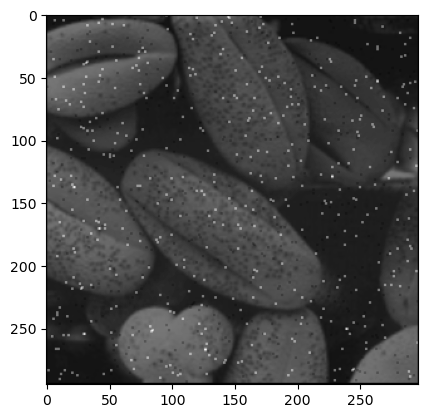

In [20]:
#Paso bajas a filtro sal pimienta con kernel 3x3
smooth_sp=filtro(im_sal_p,3,prom_kernel_estandar)
plot(smooth_sp)

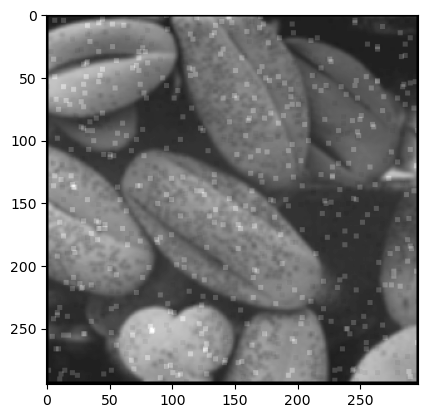

In [21]:
#Paso bajas a filtro sal pimienta con kernel 5x5
smooth_sp5=filtro(im_sal_p,5,prom_kernel_estandar)
plot(smooth_sp5)

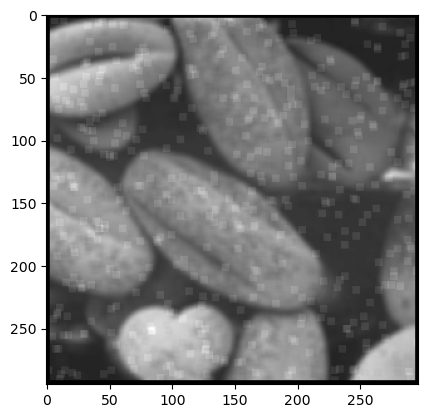

In [22]:
#Paso bajas a filtro sal pimienta con kernel 7x7
smooth_sp7=filtro(im_sal_p,7,prom_kernel_estandar)
plot(smooth_sp7)

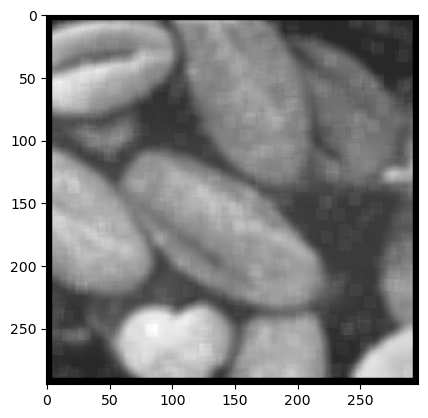

In [23]:
#Paso bajas a filtro sal pimienta con kernel 11x11
smooth_sp11=filtro(im_sal_p,11,prom_kernel_estandar)
plot(smooth_sp11)

In [24]:
#k = 4
#for i in range(3**2):
    #print(i, "%",  k, "=", (i)%k)